In [120]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import metrics

from pmdarima.model_selection import train_test_split as time_train_test_split
import xgboost

from xgboost import XGBRegressor
from xgboost import plot_importance

import warnings
warnings.filterwarnings("ignore")

In [121]:
df=pd.read_csv('Readings_last_7yr.csv')
df

,Date,Date.1,Irr
0,2014-01-01 00:30:00,2014-01-01 00:30:00,0.00
1,2014-01-01 01:30:00,2014-01-01 01:30:00,0.00
2,2014-01-01 02:30:00,2014-01-01 02:30:00,1.45
3,2014-01-01 03:30:00,2014-01-01 03:30:00,150.72
4,2014-01-01 04:30:00,2014-01-01 04:30:00,373.87
...,...,...,...
61363,2020-12-31 19:30:00,2020-12-31 19:30:00,0.00
61364,2020-12-31 20:30:00,2020-12-31 20:30:00,0.00
61365,2020-12-31 21:30:00,2020-12-31 21:30:00,0.00
61366,2020-12-31 22:30:00,2020-12-31 22:30:00,0.00


In [122]:
del df['Date.1']

In [123]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.head()

,Date,Irr
Date,,
2014-01-01 00:30:00,2014-01-01 00:30:00,0.00
2014-01-01 01:30:00,2014-01-01 01:30:00,0.00
2014-01-01 02:30:00,2014-01-01 02:30:00,1.45
2014-01-01 03:30:00,2014-01-01 03:30:00,150.72
2014-01-01 04:30:00,2014-01-01 04:30:00,373.87


In [124]:
df2 = df.copy()
del df2['Date']

In [125]:
df2.columns = ['Irradiance']

In [126]:
df2

,Irradiance
Date,
2014-01-01 00:30:00,0.00
2014-01-01 01:30:00,0.00
2014-01-01 02:30:00,1.45
2014-01-01 03:30:00,150.72
2014-01-01 04:30:00,373.87
...,...
2020-12-31 19:30:00,0.00
2020-12-31 20:30:00,0.00
2020-12-31 21:30:00,0.00


In [127]:
df.dtypes

Date     object
Irr     float64
dtype: object

NameError: name 'set_facecolor' is not defined

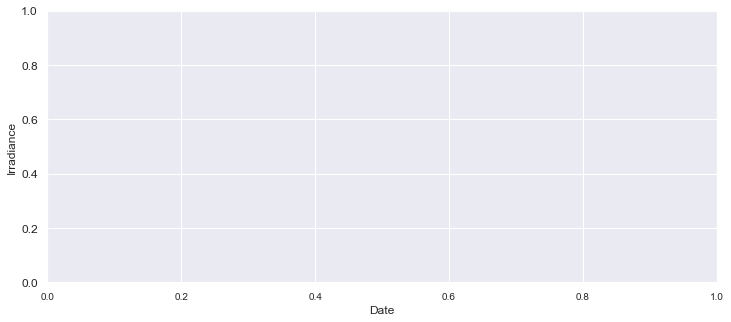

In [136]:

Irr = df2['Irradiance']
plt.figure(figsize=(12,5))
plt.ylabel("Irradiance", fontsize = 12)
plt.xlabel("Date", fontsize = 12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=12) 
# plt.legend(('TestY (Actual)','Predicted'))
# Irr.set_facecolor('yellow') 
# ax = plt.axes() 
# .set_facecolor('yellow') 

plt.plot(Irr)

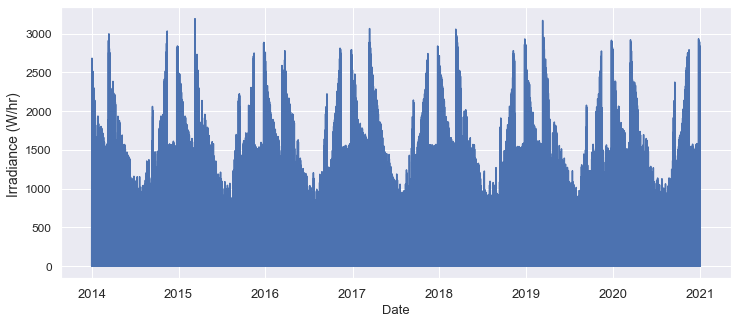

In [128]:

Irr = df2['Irradiance']
plt.figure(figsize=(12,5))
plt.ylabel("Irradiance (W/hr) ", fontsize = 14)
plt.xlabel("Date", fontsize = 13)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=12) 
# plt.legend(('TestY (Actual)','Predicted'))

plt.plot(Irr)


In [10]:
df2.dtypes

Irradiance    float64
dtype: object

Observations: 61368
Training Observations: 46026
Testing Observations: 15342


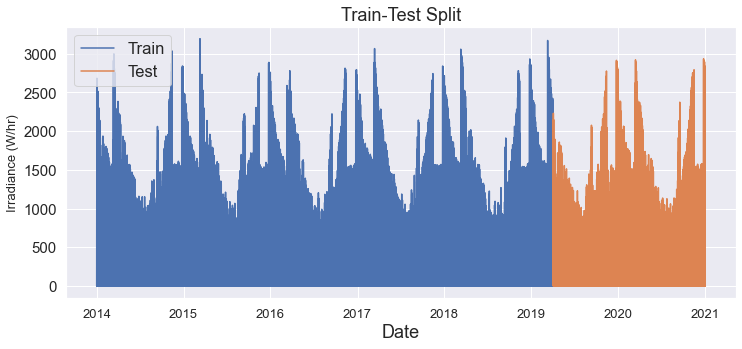

<Figure size 1440x576 with 0 Axes>

In [90]:
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('sunspots.csv', header=0, index_col=0)
X = df2
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
plt.figure(figsize=(12,5))

pyplot.plot(train)
pyplot.plot(test)
# plt.figure(figsize=(13,8))
plt.title("Train-Test Split")

plt.ylabel("Irradiance (W/hr)",fontsize = 13)
plt.xlabel("Date")
plt.legend(('Train','Test'))

plt.figure(figsize=(20,8))
pyplot.show()
# pyplot.xlabel


In [17]:
df2

,Irradiance
Date,
2014-01-01 00:30:00,0.00
2014-01-01 01:30:00,0.00
2014-01-01 02:30:00,1.45
2014-01-01 03:30:00,150.72
2014-01-01 04:30:00,373.87
...,...
2020-12-31 19:30:00,0.00
2020-12-31 20:30:00,0.00
2020-12-31 21:30:00,0.00


In [18]:
def create_features(df, target_variable):
    """
    Creates time series features from datetime index
    
    Args:
        df (float64): Values to be added to the model incl. corresponding datetime
                      , numpy array of floats
        target_variable (string): Name of the target variable within df   
    
    Returns:
        X (int): Extracted values from datetime index, dataframe
        y (int): Values of target variable, numpy array of integers
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if target_variable:
        y = df[target_variable]
        return X, y
    return X

In [19]:
def mean_absolute_percentage_error(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        Mean absolute percentage error 
    '''    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    #print('Evaluation metric results: ')
#     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
#     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
#     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [21]:
def df_create_features(df):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['Irradiance'] = df['Irradiance']
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','Irradiance']]
    return X

In [22]:
df2_features = df_create_features(df2)

In [23]:
df2_features

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Irradiance
Date,,,,,,,,,
2014-01-01 00:30:00,0,2,1,1,2014,1,1,1,0.00
2014-01-01 01:30:00,1,2,1,1,2014,1,1,1,0.00
2014-01-01 02:30:00,2,2,1,1,2014,1,1,1,1.45
2014-01-01 03:30:00,3,2,1,1,2014,1,1,1,150.72
2014-01-01 04:30:00,4,2,1,1,2014,1,1,1,373.87
...,...,...,...,...,...,...,...,...,...
2020-12-31 19:30:00,19,3,4,12,2020,366,31,53,0.00
2020-12-31 20:30:00,20,3,4,12,2020,366,31,53,0.00
2020-12-31 21:30:00,21,3,4,12,2020,366,31,53,0.00


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df2_features.corr()
round(corrmat,2)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Irradiance
hour,1.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,-0.37
dayofweek,0.00,1.0,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00
quarter,0.00,-0.0,1.00,0.97,-0.0,0.97,0.01,0.95,-0.04
month,0.00,-0.0,0.97,1.00,-0.0,1.00,0.01,0.97,-0.04
year,0.00,-0.0,-0.00,-0.00,1.0,0.00,0.00,0.00,-0.00
dayofyear,0.00,-0.0,0.97,1.00,0.0,1.00,0.09,0.98,-0.04
dayofmonth,0.00,-0.0,0.01,0.01,0.0,0.09,1.00,0.07,-0.00
weekofyear,0.00,-0.0,0.95,0.97,0.0,0.98,0.07,1.00,-0.04
Irradiance,-0.37,-0.0,-0.04,-0.04,-0.0,-0.04,-0.00,-0.04,1.00


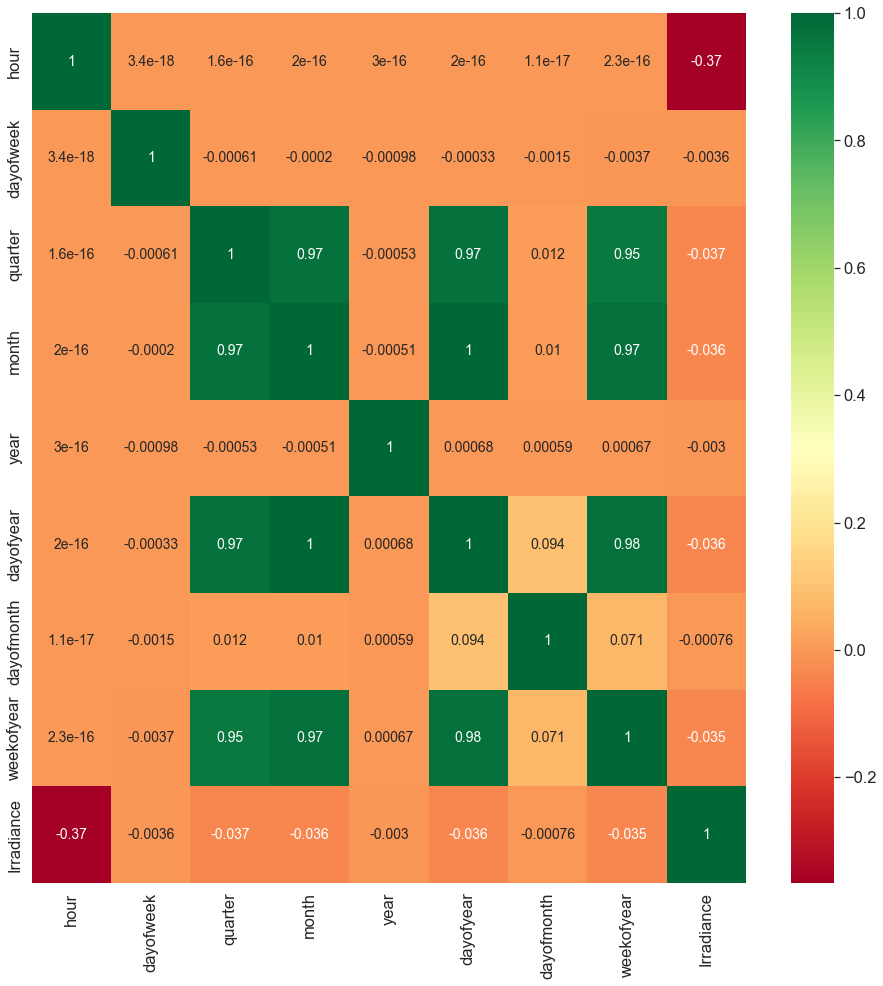

In [25]:
plt.figure(figsize=(16,16))
sns.set(font_scale=1.5)
g=sns.heatmap(df2_features.corr(),annot=True,cmap="RdYlGn",annot_kws={"size": 14})
# plt.xlabel(fontsize=16)
# plt.ylabel(fontsize=16)



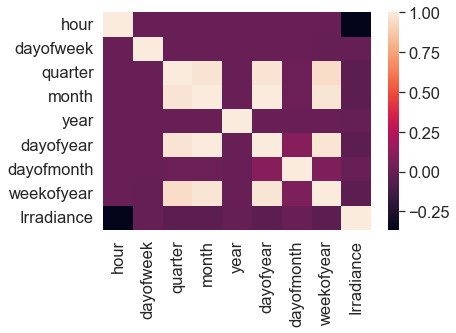

In [26]:
sns.heatmap(corrmat);


In [27]:
corrmat.style.background_gradient(cmap='coolwarm').set_precision(2)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Irradiance
hour,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.37
dayofweek,0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
quarter,0.00,-0.00,1.00,0.97,-0.00,0.97,0.01,0.95,-0.04
month,0.00,-0.00,0.97,1.00,-0.00,1.00,0.01,0.97,-0.04
year,0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,-0.00
dayofyear,0.00,-0.00,0.97,1.00,0.00,1.00,0.09,0.98,-0.04
dayofmonth,0.00,-0.00,0.01,0.01,0.00,0.09,1.00,0.07,-0.00
weekofyear,0.00,-0.00,0.95,0.97,0.00,0.98,0.07,1.00,-0.04
Irradiance,-0.37,-0.00,-0.04,-0.04,-0.00,-0.04,-0.00,-0.04,1.00


In [28]:
df2_features.dtypes

hour            int64
dayofweek       int64
quarter         int64
month           int64
year            int64
dayofyear       int64
dayofmonth      int64
weekofyear      int64
Irradiance    float64
dtype: object

In [29]:
train_copy = train.copy()
test_copy = test.copy()

trainX, trainY = create_features(train_copy, target_variable='Irradiance')
testX, testY = create_features(test_copy, target_variable='Irradiance')

In [30]:
trainX

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2014-01-01 00:30:00,0,2,1,1,2014,1,1,1
2014-01-01 01:30:00,1,2,1,1,2014,1,1,1
2014-01-01 02:30:00,2,2,1,1,2014,1,1,1
2014-01-01 03:30:00,3,2,1,1,2014,1,1,1
2014-01-01 04:30:00,4,2,1,1,2014,1,1,1
...,...,...,...,...,...,...,...,...
2019-04-02 13:30:00,13,1,2,4,2019,92,2,14
2019-04-02 14:30:00,14,1,2,4,2019,92,2,14
2019-04-02 15:30:00,15,1,2,4,2019,92,2,14


In [31]:
trainY

Date
2014-01-01 00:30:00      0.00
2014-01-01 01:30:00      0.00
2014-01-01 02:30:00      1.45
2014-01-01 03:30:00    150.72
2014-01-01 04:30:00    373.87
                        ...  
2019-04-02 13:30:00      0.00
2019-04-02 14:30:00      0.00
2019-04-02 15:30:00      0.00
2019-04-02 16:30:00      0.00
2019-04-02 17:30:00      0.00
Name: Irradiance, Length: 46026, dtype: float64

In [32]:
testX

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2019-04-02 18:30:00,18,1,2,4,2019,92,2,14
2019-04-02 19:30:00,19,1,2,4,2019,92,2,14
2019-04-02 20:30:00,20,1,2,4,2019,92,2,14
2019-04-02 21:30:00,21,1,2,4,2019,92,2,14
2019-04-02 22:30:00,22,1,2,4,2019,92,2,14
...,...,...,...,...,...,...,...,...
2020-12-31 19:30:00,19,3,4,12,2020,366,31,53
2020-12-31 20:30:00,20,3,4,12,2020,366,31,53
2020-12-31 21:30:00,21,3,4,12,2020,366,31,53


In [33]:
testY

Date
2019-04-02 18:30:00    0.0
2019-04-02 19:30:00    0.0
2019-04-02 20:30:00    0.0
2019-04-02 21:30:00    0.0
2019-04-02 22:30:00    0.0
                      ... 
2020-12-31 19:30:00    0.0
2020-12-31 20:30:00    0.0
2020-12-31 21:30:00    0.0
2020-12-31 22:30:00    0.0
2020-12-31 23:30:00    0.0
Name: Irradiance, Length: 15342, dtype: float64

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [35]:
params={
 "learning_rate"    : [0.05,0.10,0.15,0.20,0.25],
 "max_depth"        : [3,4,5,6,8,10,11,12,15],
 "min_child_weight" : [ 1,2,3,4,5,6,7,8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3,0.4],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [36]:
xgb = XGBRegressor(tree_method = "gpu_hist")


In [37]:
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [38]:
# xgb = XGBRegressor(objective= 'reg:linear', n_estimators=1000)


# xgb.fit(trainX, trainY,
#         eval_set=[(trainX, trainY), (testX, testY)],
#         early_stopping_rounds=50,
#         verbose=False) # Change verbose to True if you want to see it train

In [39]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(trainX, trainY,
        eval_set=[(trainX, trainY), (testX, testY)])
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\garvi\anaconda3\lib\site-packages\joblib\parallel.py", line 935, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "C:\Users\garvi\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 542, in wrap_future_result
    return future.result(timeout=timeout)
  File "C:\Users\garvi\anaconda3\lib\concurrent\futures\_base.py", line 440, in result
    self._condition.wait(timeout)
  File "C:\Users\garvi\anaconda3\lib\threading.py", line 312, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\garvi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\garvi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1633, in _run_search
    evaluate_candidates(ParameterSampler(
  File "C:\Users\garvi

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\garvi\anaconda3\lib\site-packages\joblib\parallel.py", line 935, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "C:\Users\garvi\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 542, in wrap_future_result
    return future.result(timeout=timeout)
  File "C:\Users\garvi\anaconda3\lib\concurrent\futures\_base.py", line 440, in result
    self._condition.wait(timeout)
  File "C:\Users\garvi\anaconda3\lib\threading.py", line 312, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\garvi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\garvi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1633, in _run_search
    evaluate_candidates(ParameterSampler(
  File "C:\Users\garvi

In [42]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import metrics

from pmdarima.model_selection import train_test_split as time_train_test_split

from xgboost import XGBRegressor
from xgboost import plot_importance

import warnings
warnings.filterwarnings("ignore")

In [41]:
random_search.best_estimator_

ERROR! Session/line number was not unique in database. History logging moved to new session 874


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=3,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)


In [43]:
## LEARNING RATE = 0.15
## MODEL 1 - with n_estimators = 1000 ---> refer to 2nd photo on whatsapp high peaks and some negative value as well
## Model 1 - with n_esttimators = 100 ----> refer to 3rd photo both peaks were low in comparison to 2nd photo 
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=12, min_child_weight=1,
             monotone_constraints='()', n_estimators=40, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)


In [ ]:
# LEARNING RATE = 0.13
## Model 2 - estimator - 100
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=12, min_child_weight=1,
             monotone_constraints='()', n_estimators=, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)


In [44]:
xgb.fit(trainX, trainY,
        eval_set=[(trainX, trainY), (testX, testY)])

[0]	validation_0-rmse:575.94049	validation_1-rmse:552.57794
[1]	validation_0-rmse:553.37457	validation_1-rmse:530.40894
[2]	validation_0-rmse:475.61572	validation_1-rmse:454.93777
[3]	validation_0-rmse:410.21549	validation_1-rmse:391.67282
[4]	validation_0-rmse:363.14414	validation_1-rmse:345.46829
[5]	validation_0-rmse:315.24939	validation_1-rmse:302.74829
[6]	validation_0-rmse:278.37668	validation_1-rmse:270.11133
[7]	validation_0-rmse:244.71761	validation_1-rmse:241.20779
[8]	validation_0-rmse:216.28635	validation_1-rmse:218.39378
[9]	validation_0-rmse:193.56369	validation_1-rmse:199.39168
[10]	validation_0-rmse:188.35036	validation_1-rmse:196.60808
[11]	validation_0-rmse:172.48430	validation_1-rmse:184.67056
[12]	validation_0-rmse:157.87463	validation_1-rmse:174.26662
[13]	validation_0-rmse:154.72797	validation_1-rmse:173.41986
[14]	validation_0-rmse:152.37999	validation_1-rmse:172.88841
[15]	validation_0-rmse:151.20403	validation_1-rmse:172.22137
[16]	validation_0-rmse:139.64745	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=40, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb,trainX,trainY)

In [46]:
score

array([0.89228632, 0.90715437, 0.92706046, 0.9186765 , 0.91058745])

In [47]:
score = cross_val_score(xgb,testX,testY,cv = 20)

In [48]:
# score = xgb.score(testX,testY)
score

array([0.89015144, 0.94922879, 0.9419888 , 0.7537577 , 0.76119736,
       0.86538429, 0.90710342, 0.86157364, 0.80922988, 0.87464894,
       0.72732746, 0.808063  , 0.93090724, 0.94825433, 0.83762641,
       0.72870383, 0.87926807, 0.96942459, 0.89685861, 0.92138663])

In [49]:
score.mean()*100

86.31042217109733

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

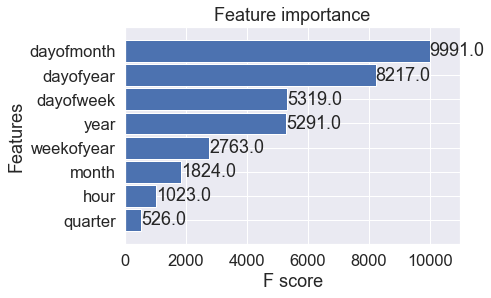

In [52]:
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [53]:
predicted_results = xgb.predict(testX)
predicted_results

array([38.91309 , 38.91309 , 38.91309 , ..., 22.481422, 22.481422,
       22.481422], dtype=float32)

# Evaluation Metrics

In [63]:
val = timeseries_evaluation_metrics_func(testY, predicted_results)


MAE is : 73.18581261664602
RMSE is : 147.3745024100536


In [55]:
# Making dataframe of TestY and predicted value

In [65]:
predicted_test_df = df2.copy()
predicted_test_df = df2[46026:]
predicted_test_df['Pred_testy'] = predicted_results
predicted_test_df.columns = ['Test_Y','Predicted_test_y']

In [66]:
predicted_test_df

,Test_Y,Predicted_test_y
Date,,
2019-04-02 18:30:00,0.0,38.913090
2019-04-02 19:30:00,0.0,38.913090
2019-04-02 20:30:00,0.0,38.913090
2019-04-02 21:30:00,0.0,38.913090
2019-04-02 22:30:00,0.0,38.913090
...,...,...
2020-12-31 19:30:00,0.0,22.481422
2020-12-31 20:30:00,0.0,22.481422
2020-12-31 21:30:00,0.0,22.481422


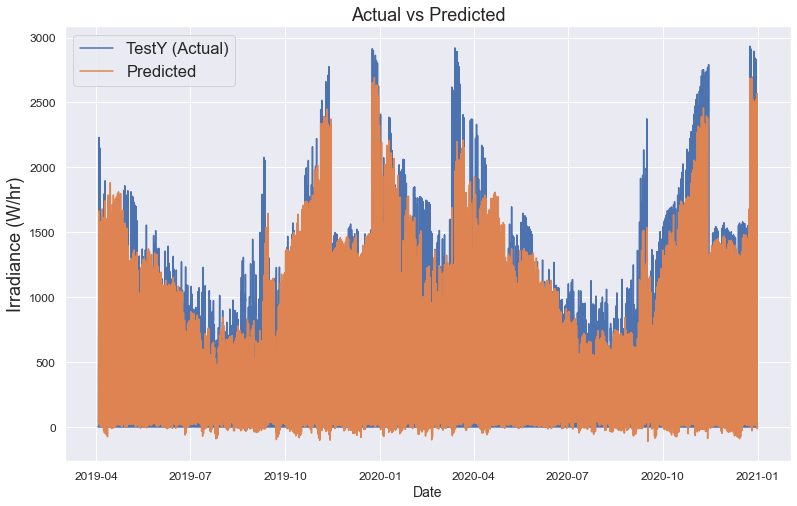

In [89]:
plt.figure(figsize=(13,8))

plt.plot(predicted_test_df['Test_Y'])
plt.plot(predicted_test_df['Predicted_test_y'])
plt.title("Actual vs Predicted")
plt.ylabel("Irradiance (W/hr)")
plt.xlabel("Date", fontsize = 14)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=15) 
plt.legend(('TestY (Actual)','Predicted'))
# plt.show()
pyplot.show()


In [68]:
test['Prediction'] = predicted_results
Irr_all = pd.concat([test, train], sort=False)
Irr_all = Irr_all.rename(columns={'Irradiation':'Original_value'})



In [69]:
Irr_all

,Irradiance,Prediction
Date,,
2019-04-02 18:30:00,0.0,38.91309
2019-04-02 19:30:00,0.0,38.91309
2019-04-02 20:30:00,0.0,38.91309
2019-04-02 21:30:00,0.0,38.91309
2019-04-02 22:30:00,0.0,38.91309
...,...,...
2019-04-02 13:30:00,0.0,NaN
2019-04-02 14:30:00,0.0,NaN
2019-04-02 15:30:00,0.0,NaN


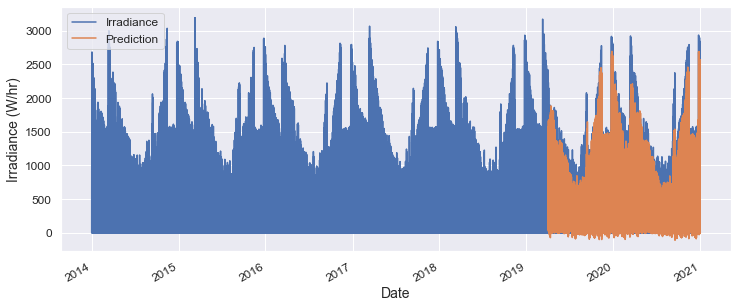

In [70]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
Overview_Complete_Data_And_Prediction = Irr_all[['Irradiance','Prediction']].plot(figsize=(12, 5))
plt.ylabel("Irradiance (W/hr)",fontsize = 14
          )
plt.xlabel("Date", fontsize = 14)
plt.legend(prop={"size":12})


# FUTURE FORECAST 

In [71]:
dti = pd.date_range("2021-01-01 00:30:00", periods=20000, freq="H")

In [72]:
df_future_dates = pd.DataFrame(dti, columns = ['Date'])


In [73]:
df_future_dates.head(300)

,Date
0,2021-01-01 00:30:00
1,2021-01-01 01:30:00
2,2021-01-01 02:30:00
3,2021-01-01 03:30:00
4,2021-01-01 04:30:00
...,...
295,2021-01-13 07:30:00
296,2021-01-13 08:30:00
297,2021-01-13 09:30:00
298,2021-01-13 10:30:00


In [74]:
df_future_dates['Irradiance'] = np.nan

In [75]:
df_future_dates

,Date,Irradiance
0,2021-01-01 00:30:00,NaN
1,2021-01-01 01:30:00,NaN
2,2021-01-01 02:30:00,NaN
3,2021-01-01 03:30:00,NaN
4,2021-01-01 04:30:00,NaN
...,...,...
19995,2023-04-14 03:30:00,NaN
19996,2023-04-14 04:30:00,NaN
19997,2023-04-14 05:30:00,NaN
19998,2023-04-14 06:30:00,NaN


In [76]:
df_future_dates.index = pd.to_datetime(df_future_dates['Date'], format='%Y-%m-%d %H:%M:%S')
df_future_dates.head()

,Date,Irradiance
Date,,
2021-01-01 00:30:00,2021-01-01 00:30:00,NaN
2021-01-01 01:30:00,2021-01-01 01:30:00,NaN
2021-01-01 02:30:00,2021-01-01 02:30:00,NaN
2021-01-01 03:30:00,2021-01-01 03:30:00,NaN
2021-01-01 04:30:00,2021-01-01 04:30:00,NaN


In [77]:
df_future_dates_copy = df_future_dates.copy()
del df_future_dates_copy['Date']

In [78]:
testX_future, testY_future = create_features(df_future_dates, target_variable='Irradiance')

In [79]:
testX_future

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2021-01-01 00:30:00,0,4,1,1,2021,1,1,53
2021-01-01 01:30:00,1,4,1,1,2021,1,1,53
2021-01-01 02:30:00,2,4,1,1,2021,1,1,53
2021-01-01 03:30:00,3,4,1,1,2021,1,1,53
2021-01-01 04:30:00,4,4,1,1,2021,1,1,53
...,...,...,...,...,...,...,...,...
2023-04-14 03:30:00,3,4,2,4,2023,104,14,15
2023-04-14 04:30:00,4,4,2,4,2023,104,14,15
2023-04-14 05:30:00,5,4,2,4,2023,104,14,15


In [80]:
from xgboost import XGBRegressor



In [81]:
# xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
#              gamma=0.3, gpu_id=0, importance_type=None,
#              interaction_constraints='', learning_rate=0.13, max_delta_step=0,
#              max_depth=12, min_child_weight=1,
#              monotone_constraints='()', n_estimators=1200, n_jobs=16,
#              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='gpu_hist', validate_parameters=1, verbosity=None)
# xgb



In [82]:
xgb.fit(trainX, trainY,
        eval_set=[(trainX, trainY), (testX, testY)],
        
        verbose=False) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=40, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [83]:
predicted_results_future = xgb.predict(testX_future)
predicted_results_future

array([ 23.480354,  23.387253,   9.014728, ..., 832.9152  , 918.8692  ,
       981.4492  ], dtype=float32)

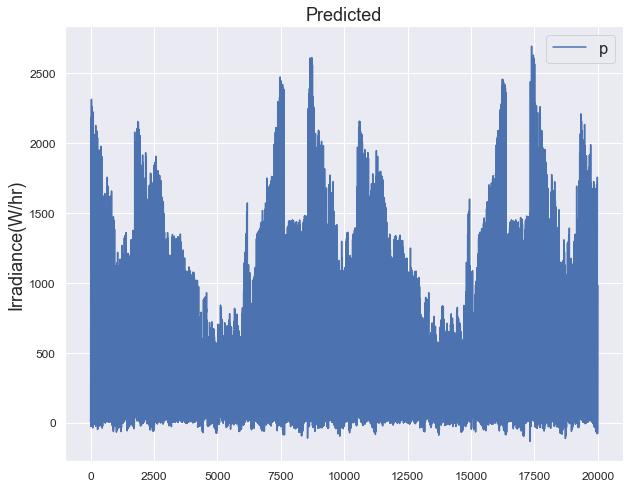

In [84]:
plt.figure(figsize=(10,8))
# plt.plot(list(testY))
plt.plot(list(predicted_results_future))
plt.title("Predicted")
plt.ylabel("Irradiance(W/hr)")
plt.legend('predicted')
plt.show()

In [85]:
df_future_dates_copy['Prediction'] = predicted_results_future
Irr_all_future = pd.concat([df2, df_future_dates_copy], sort=False)
# Irr_all = Irr_all.rename(columns={'Irradiation':'Original_Value'})

In [86]:
predicted_results_future[100:]

array([501.96146, 746.67505, 884.3544 , ..., 832.9152 , 918.8692 ,
       981.4492 ], dtype=float32)

In [87]:
Irr_all_future

,Irr,Irradiance,Prediction
Date,,,
2014-01-01 00:30:00,0.00,NaN,NaN
2014-01-01 01:30:00,0.00,NaN,NaN
2014-01-01 02:30:00,1.45,NaN,NaN
2014-01-01 03:30:00,150.72,NaN,NaN
2014-01-01 04:30:00,373.87,NaN,NaN
...,...,...,...
2023-04-14 03:30:00,NaN,NaN,540.409241
2023-04-14 04:30:00,NaN,NaN,723.444885
2023-04-14 05:30:00,NaN,NaN,832.915222


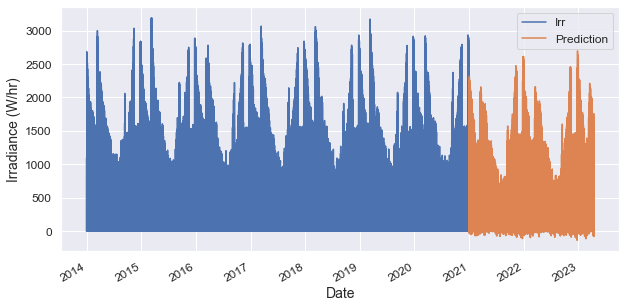

In [88]:

Overview_Complete_Data_And_Prediction_future = Irr_all_future[['Irr','Prediction']].plot(figsize=(10, 5))
plt.ylabel("Irradiance (W/hr)",fontsize = 14
          )
plt.xlabel("Date", fontsize = 14)
plt.legend(prop={"size":12})
